# k-Nearest Neighbors (k-NN) algorithm
k-NN is a simple, instance-based learning algorithm that classifies a test instance based on the majority class of its k-nearest neighbors in the training set. The distance between instances is typically measured using Euclidean distance, but other distance metrics can be used as well.

In [1]:
# example of knn classifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# load the data
#this is comment by adnan
df =sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
x = df.drop('species', axis=1)
y = df['species']

In [10]:
# load and fit the knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x, y)

# predict the species of a new iris
new_iris = np.array([[5.1, 3.5, 1.4, 0.2]])
prediction = knn.predict(new_iris)
print(prediction)

['setosa']


c:\Users\dell\miniconda3\envs\mlpractice\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



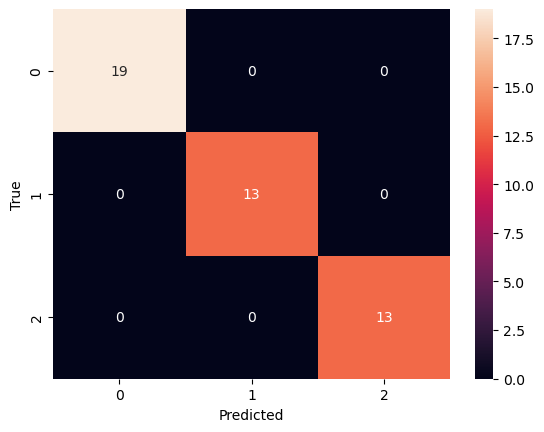

In [13]:
# train test aplit the data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

# predict the test data
y_pred = model.predict(x_test)

# evaluate the model
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#plot the matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Regression problem on tips dataset


In [20]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [21]:
x = df.drop('tip',axis=1)
y =df['tip']

In [22]:
# encode the categorical data
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in x.columns:
    if x[i].dtype == 'object' or x[i].dtype == 'category':
      x[i] = label.fit_transform(x[i])
    

In [23]:
# train test split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = KNeighborsClassifier(n_neighbors=5, metric= 'minkowski', p=2)
model.fit(x_train, y_train)

# predict the test data
y_pred = model.predict(x_test)

# evaluate the model    
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error    
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(root_mean_squared_error(y_test, y_pred))



ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.